In [30]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [32]:
y_iris = iris['species']
y_iris.shape

(150,)

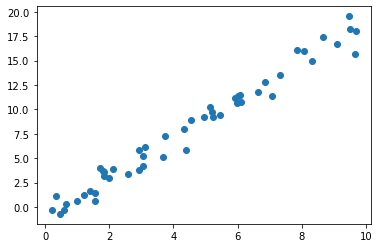

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [7]:
# Import the model class
from sklearn.linear_model import LinearRegression

In [8]:
# Instantitate the model specifying hyperparameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
# Arange data
X = x[:,np.newaxis]
X.shape

(50, 1)

In [12]:
# Fit the model
model.fit(X, y)

LinearRegression()

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311164

In [16]:
xfit = np.linspace(-1, 11)

In [19]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

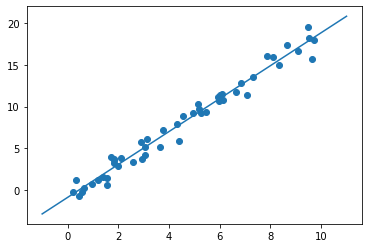

In [20]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                               random_state=1)

In [28]:
from sklearn.naive_bayes import GaussianNB # 1. choosse model class
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Unsupervised learning example

In [33]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

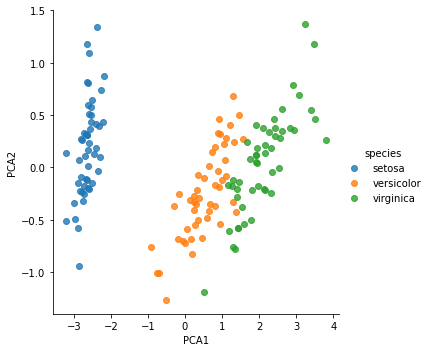

In [34]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [ ]:
from sklearn.mixture import GMM
model = GMM(n_componenets=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

# Application: Exploring Hand-written digits

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

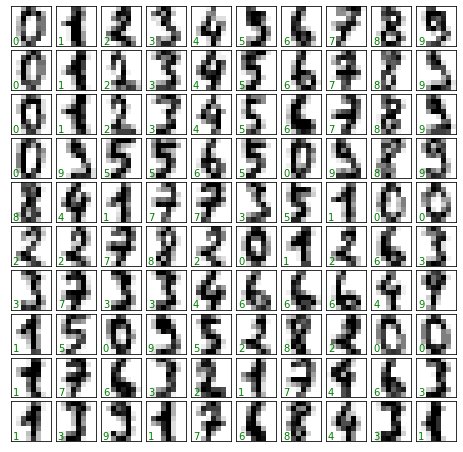

In [37]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')
    

In [38]:
X = digits.data
X.shape

(1797, 64)

In [39]:
y = digits.target
y.shape

(1797,)

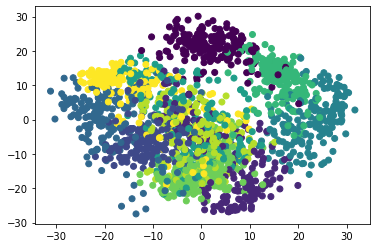

In [40]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)
X_2D = model.transform(X)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y)

In [41]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

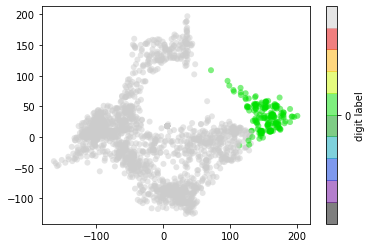

In [50]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5, 
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 0.5)

In [51]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [53]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(91.68, 0.5, 'true value')

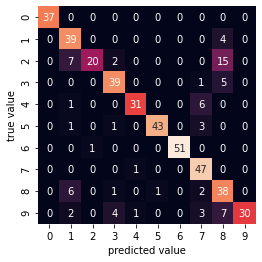

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

# Hyperparemeters and Model validation

In [1]:
# Wrong way to do model validation
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [6]:
model.fit(X, y)
y_model = model.predict(X)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, y)

1.0

In [9]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [10]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

In [15]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 - 1/(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
X_test.shape

(500, 1)

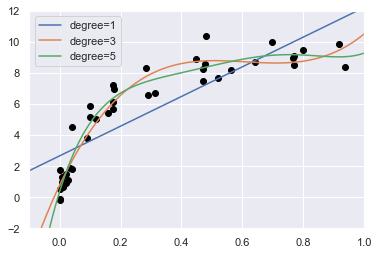

In [21]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, 
             label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept':[True, False],
             'linearregression__normalize':[True, False]}


In [46]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [47]:
grid.fit(X, y);

In [48]:
grid.best_score_

0.8972710305736544

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

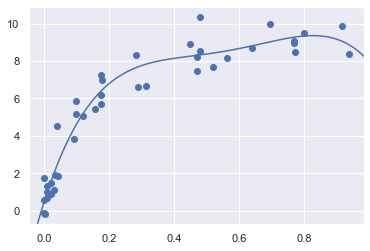

In [49]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim)

Ridge regression

In [3]:
import numpy as np
n = 100
X = np.linspace(-1, 10, n)
y = 2 * X + 0.25 * np.random.randn(100)
X = X[:, np.newaxis]

In [6]:
from sklearn.linear_model import Ridge
model = Ridge()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':np.arange(20)}
grid = GridSearchCV(model, param_grid, cv=7)

In [9]:
grid.fit(X, y)

GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [11]:
best_model = grid.best_estimator_

In [12]:
best_model.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [14]:
best_model.fit(X, y)
Xtest = np.linspace(-1, 10, 10)
Xtest = Xtest[:,np.newaxis]
y_model = best_model.predict(Xtest)

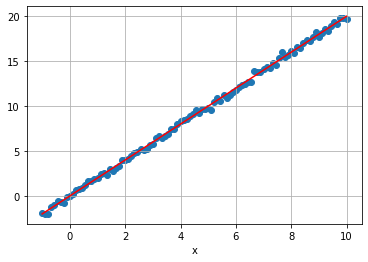

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X.ravel(), y)
plt.plot(Xtest.ravel(), y_model,'r-')
plt.xlabel('x')
plt.grid()

# In depth-Naive Bayes Classification

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

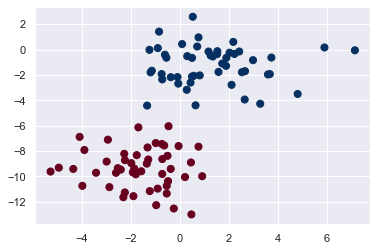

In [28]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, 
                  cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [30]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

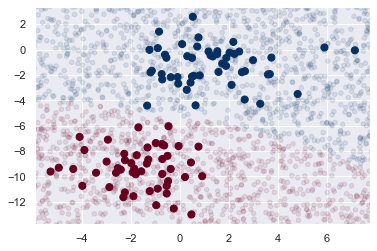

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu',
           alpha=0.1)
plt.axis(lim)

In [39]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# In depth: Linear Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
poly_model =  make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

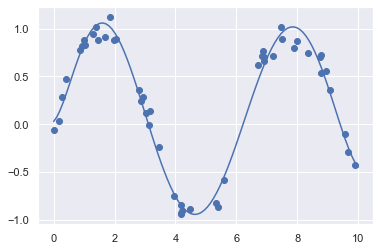

In [42]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

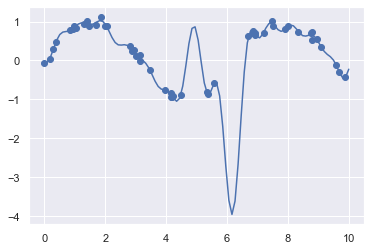

In [65]:
gauss_model = make_pipeline(GaussianFeatures(30),
                       LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [74]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge())
model.get_params()

{'memory': None,
 'steps': [('gaussianfeatures', GaussianFeatures(N=30)), ('ridge', Ridge())],
 'verbose': False,
 'gaussianfeatures': GaussianFeatures(N=30),
 'ridge': Ridge(),
 'gaussianfeatures__N': 30,
 'gaussianfeatures__width_factor': 2.0,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {'ridge__alpha':np.linspace(0, 1, 10)}
grid = GridSearchCV(model, param_grid, cv=7)

In [76]:
grid.fit(x[:, np.newaxis], y)

C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06769e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49233e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.99115e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.61269e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('gaussianfeatures',
                                        GaussianFeatures(N=30)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [77]:
best_model = grid.best_estimator_

In [78]:
best_model.get_params()

{'memory': None,
 'steps': [('gaussianfeatures', GaussianFeatures(N=30)),
  ('ridge', Ridge(alpha=0.1111111111111111))],
 'verbose': False,
 'gaussianfeatures': GaussianFeatures(N=30),
 'ridge': Ridge(alpha=0.1111111111111111),
 'gaussianfeatures__N': 30,
 'gaussianfeatures__width_factor': 2.0,
 'ridge__alpha': 0.1111111111111111,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

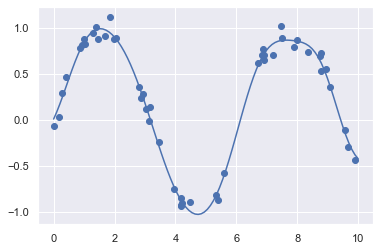

In [79]:
best_model.fit(x[:, np.newaxis], y)
yfit = best_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Lasso

In [80]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso())
model.get_params()

{'memory': None,
 'steps': [('gaussianfeatures', GaussianFeatures(N=30)), ('lasso', Lasso())],
 'verbose': False,
 'gaussianfeatures': GaussianFeatures(N=30),
 'lasso': Lasso(),
 'gaussianfeatures__N': 30,
 'gaussianfeatures__width_factor': 2.0,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {'lasso__alpha':np.linspace(0, 0.1, 100)}
grid = GridSearchCV(model, param_grid, cv=7)

In [87]:
grid.fit(x[:, np.newaxis], y)
best_model = grid.best_estimator_
best_model.get_params()

C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.058941924653466905, tolerance: 0.0017237886341575517
  model = cd_fast.enet_coordinate_descent(
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._

{'memory': None,
 'steps': [('gaussianfeatures', GaussianFeatures(N=30)),
  ('lasso', Lasso(alpha=0.0))],
 'verbose': False,
 'gaussianfeatures': GaussianFeatures(N=30),
 'lasso': Lasso(alpha=0.0),
 'gaussianfeatures__N': 30,
 'gaussianfeatures__width_factor': 2.0,
 'lasso__alpha': 0.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [88]:
best_model.fit(x[:, np.newaxis], y)
yfit = best_model.predict(xfit[:, np.newaxis])

C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muhos601\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09191869177850877, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


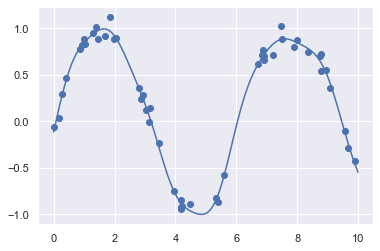

In [89]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Predicting bicycle traffic

In [90]:
import pandas as pd
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date',
                    parse_dates=True)
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [91]:
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


# Support Vector Machines

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

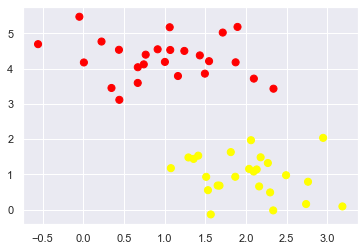

In [95]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, 
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


(-1.0, 3.5)

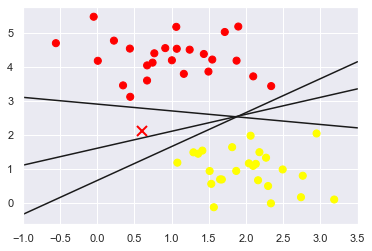

In [97]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1],'x', color='red', markeredgewidth=2,
        markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

In [98]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [99]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

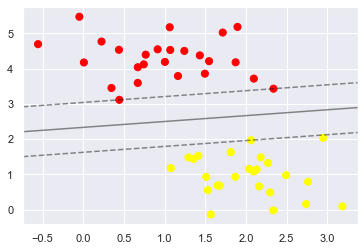

In [100]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [101]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

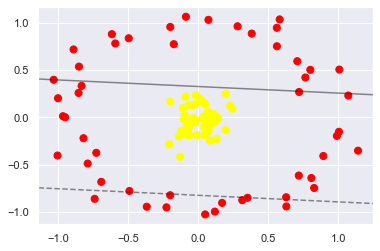

In [102]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [103]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

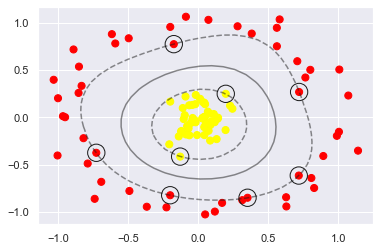

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=300, lw=1, edgecolors='k', facecolors='None');

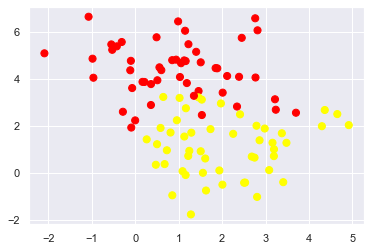

In [113]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, 
                 cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':np.linspace(0.1, 10, 10)}
model = SVC(kernel='linear')
grid = GridSearchCV(model, param_grid, cv=7)

In [118]:
grid.fit(X, y)

GridSearchCV(cv=7, estimator=SVC(kernel='linear'),
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])})

In [119]:
clf = grid.best_estimator_

In [121]:
clf.fit(X, y)

SVC(C=3.4000000000000004, kernel='linear')

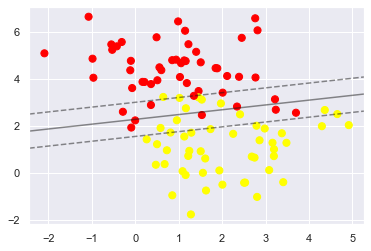

In [122]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# Example:Face recognition

In [125]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

EOFError: Compressed file ended before the end-of-stream marker was reached